In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
df = pd.read_csv('./data_combinado.csv')
#df.head()

In [3]:
# Agrupar por 'Sector Economico' y obtener los clientes únicos para cada sector
clientes_por_sector = df.groupby('Sector Economico')['id_Cliente'].unique()

# Mostrar los resultados
clientes_por_sector

Sector Economico
Captación, tratamiento y distribución de agua                    [16, 17, 18, 19, 20]
Cultivo de Hortalizas                                            [21, 22, 23, 24, 25]
Cultivo de hortalizas y melones, raíces y tubérculos                             [13]
Cultivo de otros frutos y nueces de árboles y arbustos               [11, 12, 14, 15]
Cultivo de Árboles Frutales y Nueces                                 [10, 6, 7, 8, 9]
Elaboración de cacao y chocolate y de productos de confitería         [1, 2, 3, 4, 5]
Venta al por mayor de metales y minerales metalíferos            [26, 27, 28, 29, 30]
Name: id_Cliente, dtype: object

In [4]:
# Agrupar por 'Sector Economico' y obtener los clientes únicos para cada sector
clientes_por_sector = df.groupby('id_Cliente')['Sector Economico'].unique()

# Mostrar los resultados
#clientes_por_sector

In [5]:
# Crear un Dropdown para los clientes
clientes = df['Cliente'].unique()
cliente_dropdown = widgets.Dropdown(options=clientes, description='Cliente:')

# Crear un Dropdown para los sectores económicos
sectores = df['Sector Economico'].unique()
sector_dropdown = widgets.Dropdown(options=sectores, description='Sector Económico:')

# Función para actualizar el segundo dropdown basado en el cliente seleccionado
def update_sector(*args):
    cliente_seleccionado = cliente_dropdown.value
    sectores_actualizados = df[df['Cliente'] == cliente_seleccionado]['Sector Economico'].unique()
    sector_dropdown.options = sectores_actualizados

cliente_dropdown.observe(update_sector, 'value')

# Crear un botón para filtrar datos
filtro_boton = widgets

In [6]:
# Variable global para almacenar los datos filtrados
datos_filtrados = pd.DataFrame()

# Función para filtrar datos y mostrar la tabla
def filtrar_y_mostrar_datos(boton):
    global datos_filtrados
    filtro_cliente = cliente_dropdown.value
    filtro_sector = sector_dropdown.value
    
    # Filtrar el DataFrame
    datos_filtrados = df[(df['Cliente'] == filtro_cliente) & (df['Sector Economico'] == filtro_sector)]
    
    # Mostrar el DataFrame filtrado
    clear_output(wait=True)
    display(cliente_dropdown, sector_dropdown, boton_actualizar)  # Redisplay widgets
    display(datos_filtrados)  # Mostrar los datos filtrados
    
    return datos_filtrados  # Puedes usar esta línea para continuar trabajando con los datos filtrados

# Botón para actualizar los datos mostrados
boton_actualizar = widgets.Button(description="Actualizar Datos")
boton_actualizar.on_click(filtrar_y_mostrar_datos)

# Mostrar widgets y botón
display(cliente_dropdown, sector_dropdown, boton_actualizar)

Dropdown(description='Cliente:', options=('Cliente 1 ', 'Cliente 10', 'Cliente 11', 'Cliente 12', 'Cliente 13'…

Dropdown(description='Sector Económico:', options=('Elaboración de cacao y chocolate y de productos de confite…

Button(description='Actualizar Datos', style=ButtonStyle())

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,id_Cliente,Cliente,Sector Economico,Active_energy_max,Active_energy_mean,...,Voltaje_FC_max,Voltaje_FC_mean,Voltaje_FC_Q1,Voltaje_FC_median,Voltaje_FC_min,Voltaje_FC_Q3,IQR_Active_energy_,IQR_Reactive_energy_,IQR_Voltaje_FA_,IQR_Voltaje_FC_
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19676,2023-03-31 20:00:00,1.511845,0.642091,473.424130,558.087820,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
19677,2023-03-31 21:00:00,1.395845,0.687746,537.231219,497.526966,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
19678,2023-03-31 22:00:00,0.976828,0.442356,489.302253,519.647463,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142
19679,2023-03-31 23:00:00,0.979561,0.451811,460.399523,493.639109,1,Cliente 1,Elaboración de cacao y chocolate y de producto...,6.526612,1.940788,...,1371.959942,531.965343,463.210125,504.26855,266.701236,545.930267,0.694873,0.319399,41.920523,82.720142


In [10]:
#datos_filtrados.head()

In [11]:
datos_filtrados.shape

(19681, 36)

In [12]:
def calcular_umbrales_iqr(data, column):
    # Asumimos que 'data' es el resultado de df.describe()
    Q1 = data.loc['25%', column]
    Q3 = data.loc['75%', column]
    IQR = Q3 - Q1
    Limite_inferior = max(0, Q1 - 1.5 * IQR)  # Asegurarse de que el límite inferior no sea menor que 0
    Limite_superior = Q3 + 1.5 * IQR
    return Limite_inferior, Limite_superior

# Obtenemos las estadísticas descriptivas de 'datos_filtrados'
stats_descriptivas = datos_filtrados.describe()

# para 'Active_energy'
Limite_inferior_energy, Limite_superior_energy = calcular_umbrales_iqr(stats_descriptivas, 'Active_energy')

print("Limite inferior de energy:", Limite_inferior_energy)
print("Limite superior de energy:", Limite_superior_energy)



Limite inferior de energy: 0.15510422939321766
Limite superior de energy: 2.9345962602842617


In [13]:
def marcar_anomalias(df, column, Limite_inferior, Limite_superior):
    """ Marca anomalías en la columna especificada basada en los límites dados. """
    # Crear una nueva columna para indicar si el valor es anómalo
    df['Anomaly_' + column] = ((df[column] < Limite_inferior) | (df[column] > Limite_superior))
    return df

# Aplicar la función para marcar anomalías en 'Active_energy'
df_anomalias = marcar_anomalias(datos_filtrados, 'Active_energy', Limite_inferior_energy, Limite_superior_energy)

# Mostrar las anomalías detectadas
anomalies_detected = df_anomalias[df_anomalias['Anomaly_Active_energy']]
#print("Anomalías Detectadas en Active Energy:")
#anomalies_detected[['Active_energy', 'Anomaly_Active_energy']]



C:\Users\ING.IND.ANDLO\AppData\Local\Temp\ipykernel_11432\4106825044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Anomaly_' + column] = ((df[column] < Limite_inferior) | (df[column] > Limite_superior))


In [14]:
# Establece la fecha como índice si no lo está ya
if 'Fecha' in datos_filtrados.columns:
    datos_filtrados.set_index('Fecha', inplace=True)
    
datos_filtrados = datos_filtrados.sort_index(axis=1)
#datos_filtrados.head()

In [15]:
anomalias = datos_filtrados[datos_filtrados['Anomaly_Active_energy'] == True]
anomalias

,Active_energy,Active_energy_Q1,Active_energy_Q3,Active_energy_max,Active_energy_mean,Active_energy_median,Active_energy_min,Anomaly_Active_energy,Cliente,IQR_Active_energy_,...,Voltaje_FA_median,Voltaje_FA_min,Voltaje_FC,Voltaje_FC_Q1,Voltaje_FC_Q3,Voltaje_FC_max,Voltaje_FC_mean,Voltaje_FC_median,Voltaje_FC_min,id_Cliente
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-07 02:00:00,0.063475,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,491.184239,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2021-01-07 04:00:00,0.120975,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,472.759035,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2021-01-07 08:00:00,0.064028,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,488.473244,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2021-01-07 14:00:00,0.066474,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,512.340976,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2021-01-14 05:00:00,0.010552,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,507.427112,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11 11:00:00,0.151264,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,518.498476,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2023-03-11 13:00:00,0.069781,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,450.056141,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1
2023-03-11 14:00:00,0.067594,1.197414,1.892287,6.526612,1.940788,1.494509,0.001715,True,Cliente 1,0.694873,...,499.916062,327.698085,377.289978,463.210125,545.930267,1371.959942,531.965343,504.26855,266.701236,1


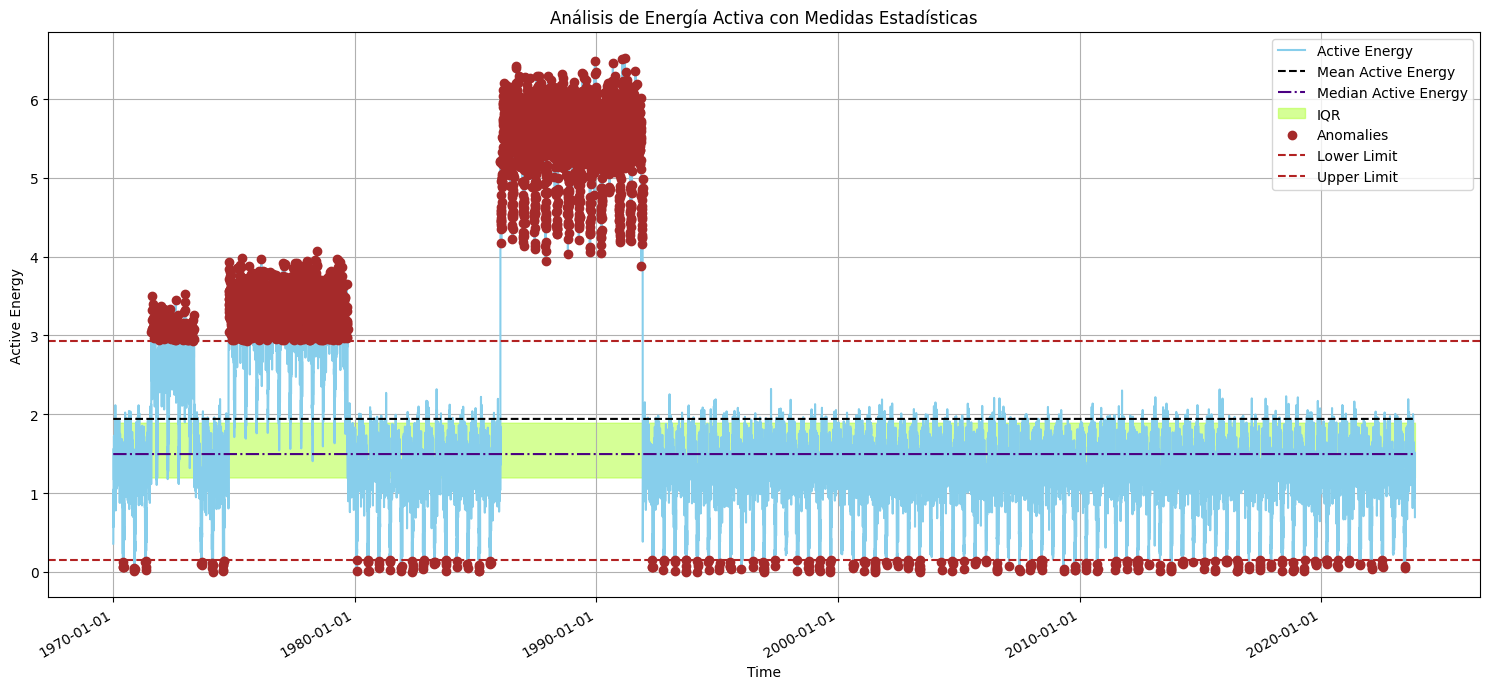

In [16]:
anomalias = datos_filtrados[datos_filtrados['Anomaly_Active_energy'] == True]

plt.figure(figsize=(15, 7))

# Graficar las líneas de la energía activa, media y mediana primero
plt.plot(datos_filtrados.index, datos_filtrados['Active_energy'], label='Active Energy', color='skyblue')
plt.plot(datos_filtrados.index, datos_filtrados['Active_energy_mean'], label='Mean Active Energy', linestyle='--', color='black')
plt.plot(datos_filtrados.index, datos_filtrados['Active_energy_median'], label='Median Active Energy', linestyle='-.', color='indigo')

# Asegurar que el IQR es visible, dibujándolo después de la línea azul
plt.fill_between(datos_filtrados.index, datos_filtrados['Active_energy_Q1'], datos_filtrados['Active_energy_Q3'], color='greenyellow', alpha=0.5, label='IQR')

# Resaltar las anomalías
plt.scatter(anomalias.index, anomalias['Active_energy'], color='brown', label='Anomalies', zorder=5)

# Añadir líneas para los límites inferior y superior
plt.axhline(y=Limite_inferior_energy, color='firebrick', linestyle='--', label='Lower Limit')
plt.axhline(y=Limite_superior_energy, color='firebrick', linestyle='--', label='Upper Limit')

# Configurar el formato de las fechas en el eje x
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotación automática para fechas

plt.title('Análisis de Energía Activa con Medidas Estadísticas')
plt.xlabel('Time')
plt.ylabel('Active Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Eliminar las columnas 'Cliente' y 'Sector Economico' del DataFrame
#datos_filtrados.drop(['Cliente', 'Sector Economico'], axis=1, inplace=True)

# Verificar las columnas restantes para confirmar que las columnas han sido eliminadas
#datos_filtrados.columns

# MODELO LSTM

## 1. Preparación de Datos

C:\Miniconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0094
Epoch 2/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.0023
Epoch 3/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - loss: 0.0022
Epoch 4/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0022
Epoch 5/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0022
Epoch 6/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0022
Epoch 7/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.0022
Epoch 8/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0022
Epoch 9/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 0.0022
Epoch 10/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 34s 5ms/step - loss: 0.0022
Epoch 11/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.0022
Epoch 12/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 0.0022
Epoch 13/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0022
Epoch 14/50
6437/6437 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - loss: 0.0022
Epoch 15/50
643

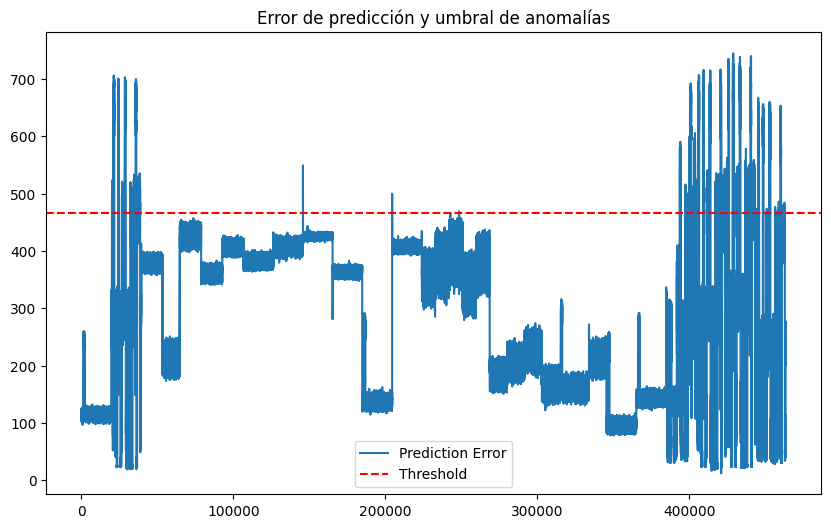

14482/14482 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step
Mean Absolute Error: 19.330890547230972
Mean Squared Error: 4063.287561157579
Root Mean Squared Error: 63.74392175852988
R-squared: 0.9483741802419697


In [18]:
# Escoger las columnas relevantes para el modelo
features = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC',
            'Active_energy_max', 'Active_energy_mean', 'Active_energy_Q1',
            'Active_energy_median', 'Active_energy_min', 'Active_energy_Q3']

# Normalización de los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df[features])

# Crear secuencias para el entrenamiento del LSTM
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

# Tamaño de la secuencia
n_steps = 3
X, y = create_sequences(scaled_features, n_steps)

model2 = Sequential()
model2.add(LSTM(50, activation='relu', input_shape=(n_steps, len(features))))
model2.add(Dropout(0.2))
model2.add(Dense(len(features)))
model2.compile(optimizer='adam', loss='mse')

# Inicia el temporizador
start_time = time.time()

# Entrenamiento del Modelo
model2.fit(X, y, epochs=50, batch_size=72, verbose=1)
#27 min

# Predicciones
predictions2 = model2.predict(X)

# Transformar de nuevo a escala original
predictions2 = scaler.inverse_transform(predictions2)

# Calcular errores de predicción
errors2 = np.mean(np.abs(predictions2 - y), axis=1)

# Determinar un umbral de error para la detección de anomalías
error_threshold2 = np.percentile(errors2, 95)  # Ajustar según sea necesario

# Detectar puntos donde el error de predicción excede el umbral
anomalies = errors2 > error_threshold2

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(errors2, label='Prediction Error')
plt.axhline(y=error_threshold2, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Error de predicción y umbral de anomalías')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 'true_values' son los valores reales y 'predicted_values' las predicciones del modelo
true_values = scaler.inverse_transform(y.reshape(-1, len(features)))
predicted_values = scaler.inverse_transform(model2.predict(X))

mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
r_squared = r2_score(true_values, predicted_values)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


## 2. Construcción del Modelo LSTM

## 3. Predicción y Detección de Anomalías

14482/14482 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


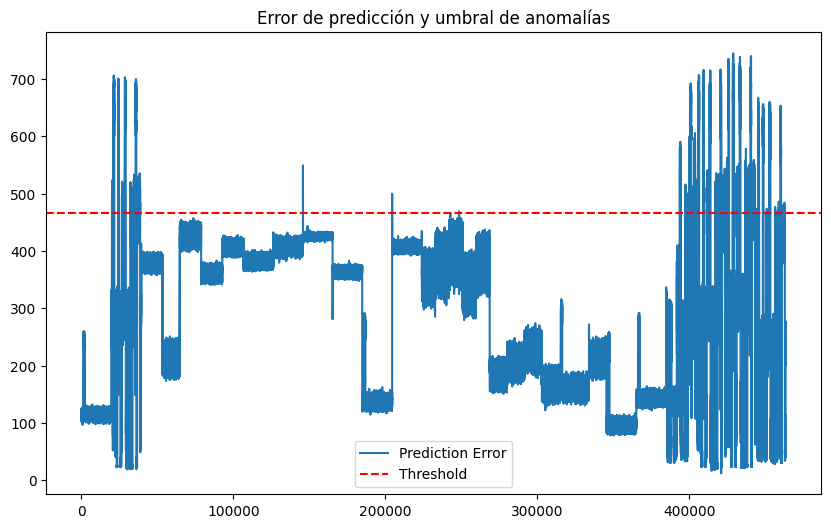

14482/14482 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step
Mean Absolute Error: 19.330890547230972
Mean Squared Error: 4063.287561157579
Root Mean Squared Error: 63.74392175852988
R-squared: 0.9483741802419697


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Predicciones
predictions2 = model2.predict(X)

# Transformar de nuevo a escala original
predictions2 = scaler.inverse_transform(predictions2)

# Calcular errores de predicción
errors2 = np.mean(np.abs(predictions2 - y), axis=1)

# Determinar un umbral de error para la detección de anomalías
error_threshold2 = np.percentile(errors2, 95)  # Ajustar según sea necesario

# Detectar puntos donde el error de predicción excede el umbral
anomalies = errors2 > error_threshold2


plt.figure(figsize=(10, 6))
plt.plot(errors2, label='Prediction Error')
plt.axhline(y=error_threshold2, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Error de predicción y umbral de anomalías')
plt.show()


# 'true_values' son los valores reales y 'predicted_values' las predicciones del modelo
true_values = scaler.inverse_transform(y.reshape(-1, len(features)))
predicted_values = scaler.inverse_transform(model2.predict(X))

mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
r_squared = r2_score(true_values, predicted_values)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

## 4. Visualización de Resultados

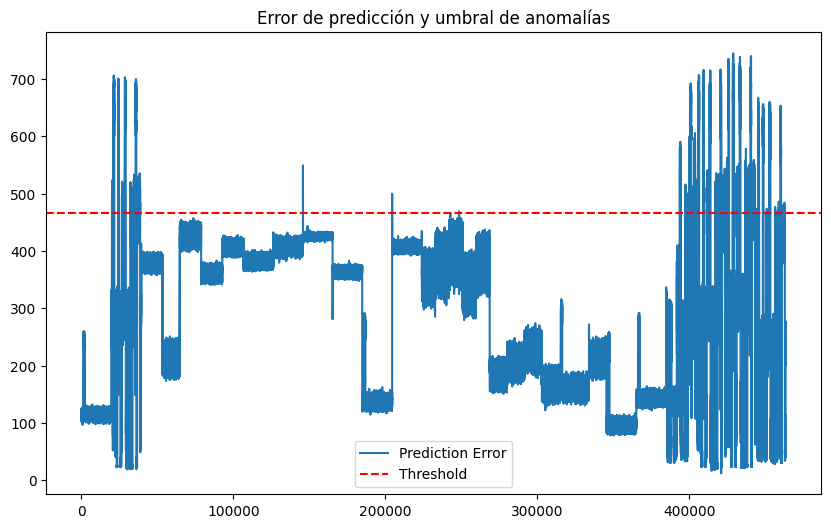

14482/14482 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step
Mean Absolute Error: 19.330890547230972
Mean Squared Error: 4063.287561157579
Root Mean Squared Error: 63.74392175852988
R-squared: 0.9483741802419697


In [20]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(errors2, label='Prediction Error')
plt.axhline(y=error_threshold2, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Error de predicción y umbral de anomalías')
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 'true_values' son los valores reales y 'predicted_values' las predicciones del modelo
true_values = scaler.inverse_transform(y.reshape(-1, len(features)))
predicted_values = scaler.inverse_transform(model2.predict(X))

mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
r_squared = r2_score(true_values, predicted_values)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 'true_values' son los valores reales y 'predicted_values' las predicciones del modelo
true_values = scaler.inverse_transform(y.reshape(-1, len(features)))
predicted_values = scaler.inverse_transform(model2.predict(X))

mae = mean_absolute_error(true_values, predicted_values)
mse = mean_squared_error(true_values, predicted_values)
rmse = np.sqrt(mse)
r_squared = r2_score(true_values, predicted_values)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)


11298/14482 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

* Cliente 17      [Captación, tratamiento y distribución de agua]
 
 14482/14482 [==============================] - 33s 2ms/step
 
Mean Absolute Error: 19.81623667625636

Mean Squared Error: 4219.544203600669

Root Mean Squared Error: 64.95801877828994

R-squared: 0.9477779250566396


* Cliente 29    [Venta al por mayor de metales y minerales met...]

14482/14482 [==============================] - 28s 2ms/step

Mean Absolute Error: 18.36544776226952

Mean Squared Error: 3866.0151916496807

Root Mean Squared Error: 62.177288390936454

R-squared: 0.9489593602328348


* Cliente 1     [Elaboración de cacao y chocolate y de product...]

14482/14482 [==============================] - 29s 2ms/step

Mean Absolute Error: 18.390373092808396

Mean Squared Error: 3884.9962481313623

Root Mean Squared Error: 62.32973807205805

R-squared: 0.9473912524799262


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los clientes
clientes = ['Cliente 17', 'Cliente 29', 'Cliente 1']
sectores = ['Captación de agua', 'Metales y minerales', 'Elaboración de cacao']
mae_values = [19.8162, 18.3654, 18.3904]

# Establecer una paleta de colores más clara
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # Colores brillantes para mejor visualización

plt.figure(figsize=(10,4))
bar_plot = plt.bar(clientes, mae_values, color=colors, alpha=0.8)

# Añadir título y etiquetas con un tamaño de fuente adecuado
plt.title('Mean Absolute Error (MAE) por Cliente y Sector', pad=30,fontsize=14)
plt.xlabel('Clientes', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)

# Rotar las etiquetas en el eje x para mejor visualización
plt.xticks(rotation=45)

# Anotar los sectores en la gráfica para más contexto
for i, bar in enumerate(bar_plot):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{sectores[i]} (MAE: {mae_values[i]:.2f})', ha='center', va='bottom', fontsize=10)

ax = plt.gca()  # Obtener el eje actual
ax.spines['top'].set_visible(False)    # Ocultar el borde superior
ax.spines['right'].set_visible(False)  # Ocultar el borde derecho
ax.spines['left'].set_visible(False)   # Ocultar el borde izquierdo
ax.spines['bottom'].set_visible(False) # Ocultar el borde inferior

# Agregar líneas de grid horizontal para facilitar la lectura
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
# Datos
labels = ['Cliente 17', 'Cliente 29', 'Cliente 1']
sectores = ['Captación de agua', 'Metales y minerales', 'Elaboración de cacao']
mae_values = [19.8162, 18.3654, 18.3904]
mse_values = [4219.5442, 3866.0152, 3884.9962]
rmse_values = [64.9580, 62.1773, 62.3297]
r2_values = [0.9478, 0.9490, 0.9474]


# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))  # 2x2 grid

# Configurar cada subplot
axes[0, 0].bar(labels, mae_values, color='blue')
axes[0, 0].set_title('Mean Absolute Error (MAE)',pad=30)
axes[0, 0].set_ylabel('MAE')

axes[0, 1].bar(labels, mse_values, color='red')
axes[0, 1].set_title('Mean Squared Error (MSE)',pad=30)
axes[0, 1].set_ylabel('MSE')

axes[1, 0].bar(labels, rmse_values, color='green')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)',pad=30)
axes[1, 0].set_ylabel('RMSE')

axes[1, 1].bar(labels, r2_values, color='purple')
axes[1, 1].set_title('R-squared (R²)',pad=30)
axes[1, 1].set_ylabel('R²')


ax.spines['top'].set_visible(False)    # Ocultar el borde superior
ax.spines['right'].set_visible(False)  # Ocultar el borde derecho
ax.spines['left'].set_visible(False)   # Ocultar el borde izquierdo
ax.spines['bottom'].set_visible(False) # Ocultar el borde inferior

# Ajustar el layout para evitar solapamientos
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['Cliente 17', 'Cliente 29', 'Cliente 1']
sectores = ['Captación de agua', 'Metales y minerales', 'Elaboración de cacao']
mae_values = [19.8162, 18.3654, 18.3904]
mse_values = [4219.5442, 3866.0152, 3884.9962]
rmse_values = [64.9580, 62.1773, 62.3297]
r2_values = [0.9478, 0.9490, 0.9474]

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # 2x2 grid

# Configurar cada subplot
axes[0, 0].bar(labels, mae_values, color='blue')
axes[0, 0].set_title('Mean Absolute Error (MAE)', pad=5)
axes[0, 0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axes[0, 0].text(i, v + 0.5, f"{v:.2f}", ha='center')

axes[0, 1].bar(labels, mse_values, color='red')
axes[0, 1].set_title('Mean Squared Error (MSE)', pad=20)
axes[0, 1].set_ylabel('MSE')
for i, v in enumerate(mse_values):
    axes[0, 1].text(i, v + 50, f"{v:.2f}", ha='center')

axes[1, 0].bar(labels, rmse_values, color='green')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)', pad=20)
axes[1, 0].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axes[1, 0].text(i, v + 0.5, f"{v:.2f}", ha='center')

axes[1, 1].bar(labels, r2_values, color='purple')
axes[1, 1].set_title('R-squared (R²)', pad=20)
axes[1, 1].set_ylabel('R²')
for i, v in enumerate(r2_values):
    axes[1, 1].text(i, v + 0.005, f"{v:.4f}", ha='center')

# Ocultar los bordes de cada subplot
for ax in axes.flat:
    ax.spines['top'].set_visible(False)    # Ocultar el borde superior
   


In [ ]:
import matplotlib.pyplot as plt

# Datos
labels = ['Cliente 17', 'Cliente 29', 'Cliente 1']
mae_values = [19.8162, 18.3654, 18.3904]
mse_values = [4219.5442, 3866.0152, 3884.9962]
rmse_values = [64.9580, 62.1773, 62.3297]
r2_values = [0.9478, 0.9490, 0.9474]
for i, v in enumerate(mae_values):
    axes[0, 0].text(i, v + 0.5, f"{v:.2f}", ha='center')

# Colores menos vivos
colors_mae = ['#7293cb', '#e1974c', '#84ba5b']
colors_mse = ['#6a3d9a', '#ff7f00', '#b15928']
colors_rmse = ['#cab2d6', '#fdbf6f', '#b2df8a']
colors_r2 = ['#1f78b4', '#33a02c', '#fb9a99']

# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))  # 2x2 grid

# Configurar cada subplot
axes[0, 0].bar(labels, mae_values, color=colors_mae)
axes[0, 0].set_title('Mean Absolute Error (MAE)', pad=40)
axes[0, 0].set_ylabel('MAE')
for i, v in enumerate(mae_values):
    axes[0, 0].text(i, v + 0.5, f"{v:.2f}", ha='center')
    
axes[0, 1].bar(labels, mse_values, color=colors_mse)
axes[0, 1].set_title('Mean Squared Error (MSE)', pad=40)
axes[0, 1].set_ylabel('MSE')
for i, v in enumerate(mse_values):
    axes[0, 1].text(i, v + 50, f"{v:.2f}", ha='center')
    
axes[1, 0].bar(labels, rmse_values, color=colors_rmse)
axes[1, 0].set_title('Root Mean Squared Error (RMSE)', pad=40)
axes[1, 0].set_ylabel('RMSE')
for i, v in enumerate(rmse_values):
    axes[1, 0].text(i, v + 0.5, f"{v:.2f}", ha='center')
    
axes[1, 1].bar(labels, r2_values, color=colors_r2)
axes[1, 1].set_title('R-squared (R²)', pad=40)
axes[1, 1].set_ylabel('R²')
for i, v in enumerate(r2_values):
    axes[1, 1].text(i, v + 0.005, f"{v:.4f}", ha='center')
    
# Ajustar el layout para evitar solapamientos
fig.tight_layout()

# Ocultar los bordes de cada subplot
for ax in axes.flat:
    ax.spines['top'].set_visible(False)    # Ocultar el borde superior

# Mostrar el gráfico
plt.show()
